In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [3]:
path = untar_data(URLs.PETS)
Path.BASE_PATH = path

In [4]:
# pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
#                  get_items=get_image_files, 
#                  splitter=RandomSplitter(seed=42),
#                  get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
#                  item_tfms=Resize(460),
#                  batch_tfms=aug_transforms(size=224, min_scale=0.75))
# dls = pets.dataloaders(path/"images")

Could not do one pass in your dataloader, there is something wrong in it


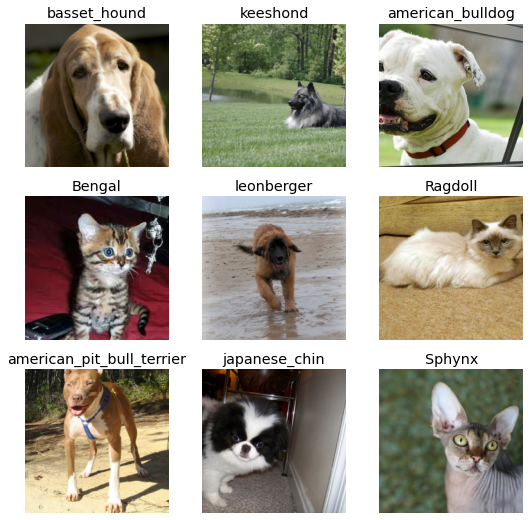

In [5]:
# dls.show_batch()

In [6]:
# pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /storage/data/oxford-iiit-pet/images/shiba_inu_180.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /storage/data/oxford-iiit-pet/images/shiba_inu_180.jpg
    applying partial gives
      shiba_inu
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(33)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(33))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline:

In [ ]:
# learn = cnn_learner(dls, resnet34, metrics=error_rate)
# learn.fit_one_cycle(3, 3e-3)
# learn.unfreeze()
# learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.140491,0.364050,0.116373,01:37
1,0.548657,0.273062,0.083221,01:33
2,0.336858,0.240450,0.073072,01:33


epoch,train_loss,valid_loss,error_rate,time
0,0.277146,0.230878,0.071042,01:59


In [ ]:
# learn.recorder.plot_loss()

Shipping as online module

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

In [ ]:
# learn.export()
path = Path()
path.ls(file_exts='.pkl')
#Export pkl and check it exists

In [ ]:
#load learner and do predictions
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

In [ ]:
#Notebook GUI
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

pred,pred_idx,probs = learn_inf.predict(img)

lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred



In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])